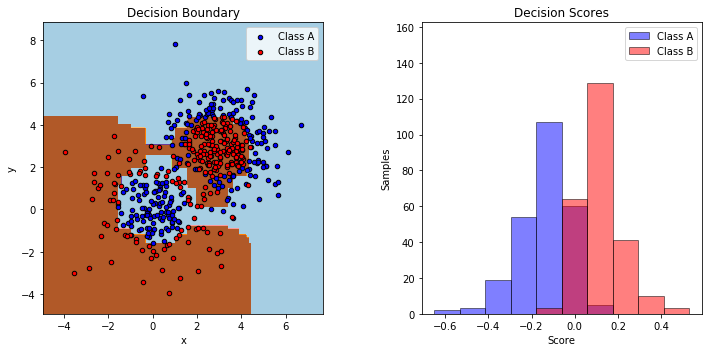

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles


# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(X, y)

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5,
             edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

##Problem-1: Compare the performance of two different classification methods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
data_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data", header=None)

df_names = pd.read_csv("./df_names.csv", header=None)
df_names_lst = []
for i in range(len(df_names)):
    word = df_names.loc[i]
    words = word[0].split(":")
    df_names_lst.append(words[0])

df_names_lst.append("target")
data_df.columns = df_names_lst

print(df.shape)
data_df.head(5)

(4601, 58)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
#Check Null values
data_df.isnull().sum().sum() # No Null Values in the dataset

0

In [96]:
#Assign the data
Y = data_df.loc[:,"target"]
X= data_df.loc[:, :"capital_run_length_total"]
X.head()    

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [5]:
#Normalizing the X data variables 
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1)) #Normalize the X train variables in range (0,1)
X_norm = min_max_scaler.fit_transform(X)
X_norm[0]

array([ 0.        ,  0.04481793,  0.1254902 ,  0.        ,  0.032     ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.06618407,  0.        ,  0.        ,  0.        ,
        0.016     ,  0.        ,  0.14191419,  0.10293333,  0.        ,
        0.08640864,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.02395468,  0.        ,  0.        ,  0.00250204,
        0.00600721,  0.01748737])

In [3]:
from sklearn.datasets import make_gaussian_quantiles
X1, Y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=500, n_features=2,
                                 n_classes=2, random_state=1)

In [2]:
X1.shape

(500, 2)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import svm

##Problem-1-a: Non-linear classification methods such as SVM

Ans:

Based on the following Gridsearchcv functions with Accuracy/ Precision/ Recall on the normalized dataset, the proposed best non-linear SVM classifier is with 'rbf' kernel, C = 10, gamma=1 and the best non-linear NuSVC classifer is with 'rbf' kernel, gamma =10, nu=0.3. These TWO best classifiers are also picked by the Accuracy metrics. By comparing the above TWO classifier, I would go for the SVM classifier in terms of the followings. For the time comsumed on the model building, the SVC classifier takes a lot less time with similar parameter fits to the model. For the recall / sensitivity, SVC is more superior NuSVC classifier which means that the recall rate is very balance for the both Classes (0 and 1) reaches about 94%. 

By only looking at the SVC classifier with 'rbf' kernel, C = 10, gamma=1, we could observe that the C value is not low which means the decision boundary is NOT soft. In this hard boundary condition, there would be a fairy high chance to have over-fitting condition on the training set. However, the Re-test result on the data with these parameters comes up a very good accuracy on training (92.1%) and testing set(91.6%). In this model, the optimal value of gamma=1 which is not bad value. The higher the value of gamma means the less of the area covered for the specified class label or vica versa. So that it means that each class takes balanced area of each other.

# Tuning Non-Linear SVM parameters for accuracy

Best parameters set found on development set:

{'C': 10, 'gamma': 1}

Grid scores on development set:

0.606 (+/-0.001) for {'C': 1e-05, 'gamma': 1e-05}
0.606 (+/-0.001) for {'C': 1e-05, 'gamma': 0.0001}
0.606 (+/-0.001) for {'C': 1e-05, 'gamma': 0.001}
0.606 (+/-0.001) for {'C': 1e-05, 'gamma': 0.01}
0.606 (+/-0.001) for {'C': 1e-05, 'gamma': 0.1}
0.606 (+/-0.001) for {'C': 1e-05, 'gamma': 1}
0.606 (+/-0.001) for {'C': 1e-05, 'gamma': 1}
0.606 (+/-0.001) for {'C': 1e-05, 'gamma': 10}
0.606 (+/-0.001) for {'C': 0.0001, 'gamma': 1e-05}
0.606 (+/-0.001) for {'C': 0.0001, 'gamma': 0.0001}
0.606 (+/-0.001) for {'C': 0.0001, 'gamma': 0.001}
0.606 (+/-0.001) for {'C': 0.0001, 'gamma': 0.01}
0.606 (+/-0.001) for {'C': 0.0001, 'gamma': 0.1}
0.606 (+/-0.001) for {'C': 0.0001, 'gamma': 1}
0.606 (+/-0.001) for {'C': 0.0001, 'gamma': 1}
0.606 (+/-0.001) for {'C': 0.0001, 'gamma': 10}
0.606 (+/-0.001) for {'C': 0.001, 'gamma': 1e-05}
0.606 (+/-0.001)

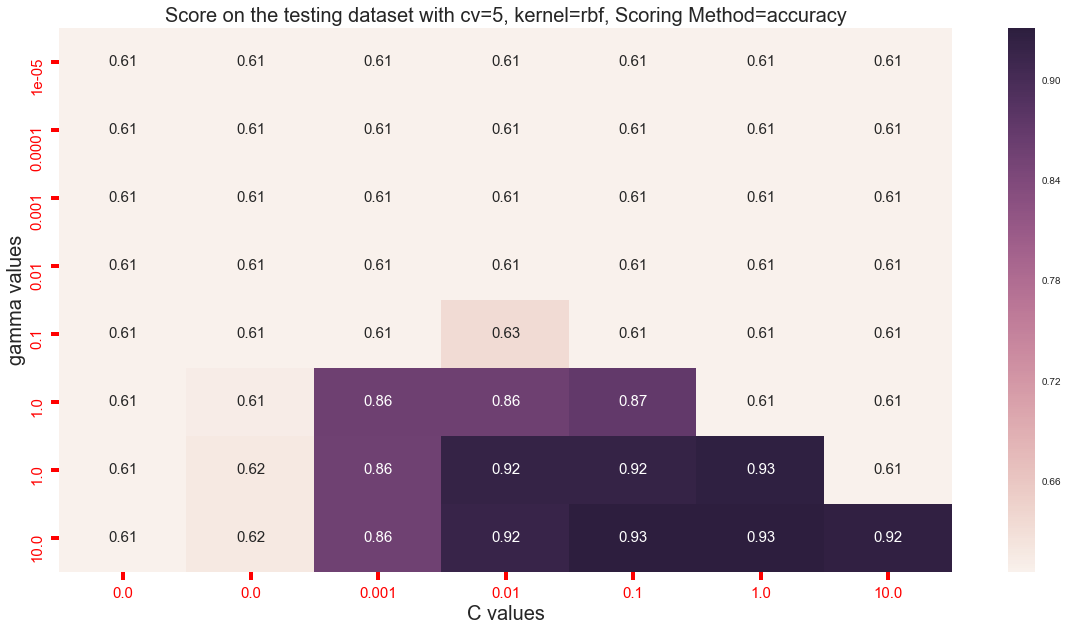

# Tuning Non-Linear SVM parameters for precision



/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/KevQuant/anaconda/lib/python3.6/site-

/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/KevQuant/anaconda/lib/python3.6/site-

/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/KevQuant/anaconda/lib/python3.6/site-

/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/KevQuant/anaconda/lib/python3.6/site-

/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/KevQuant/anaconda/lib/python3.6/site-

/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/KevQuant/anaconda/lib/python3.6/site-

Best parameters set found on development set:

{'C': 0.01, 'gamma': 10}

Grid scores on development set:

0.000 (+/-0.000) for {'C': 1e-05, 'gamma': 1e-05}
0.000 (+/-0.000) for {'C': 1e-05, 'gamma': 0.0001}
0.000 (+/-0.000) for {'C': 1e-05, 'gamma': 0.001}
0.000 (+/-0.000) for {'C': 1e-05, 'gamma': 0.01}
0.000 (+/-0.000) for {'C': 1e-05, 'gamma': 0.1}
0.000 (+/-0.000) for {'C': 1e-05, 'gamma': 1}
0.000 (+/-0.000) for {'C': 1e-05, 'gamma': 1}
0.000 (+/-0.000) for {'C': 1e-05, 'gamma': 10}
0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 1e-05}
0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 0.0001}
0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 0.001}
0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 0.01}
0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 0.1}
0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 1}
0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 1}
0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 10}
0.000 (+/-0.000) for {'C': 0.001, 'gamma': 1e-05}
0.000 (+/-0.000) for {'C': 0.001, 'gamma': 0.0001}
0.000 (+/-0

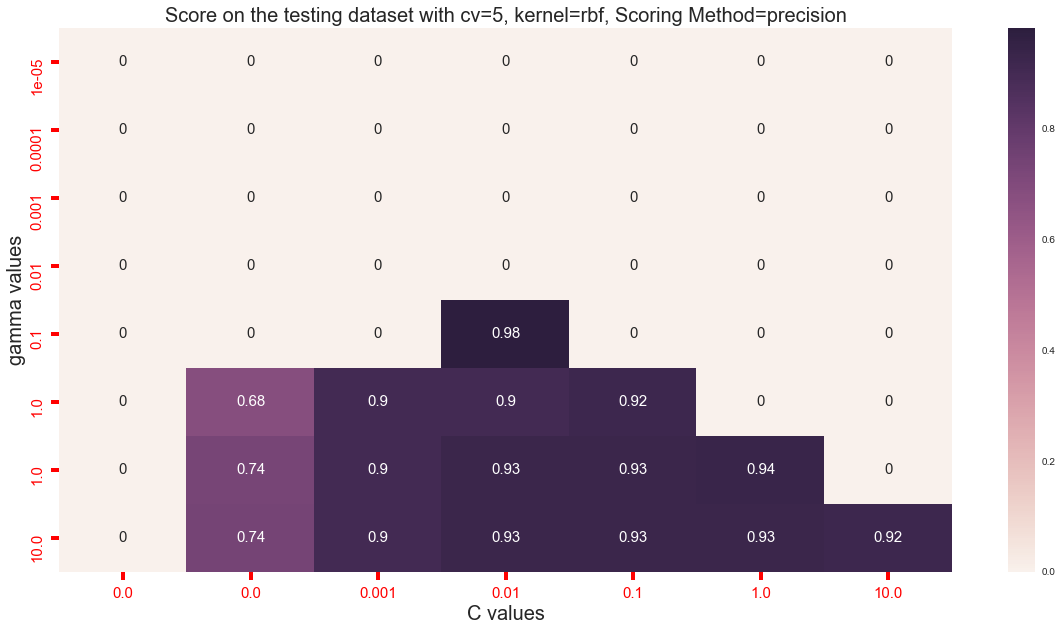

# Tuning Non-Linear SVM parameters for recall

Best parameters set found on development set:

{'C': 10, 'gamma': 1}

Grid scores on development set:

0.000 (+/-0.000) for {'C': 1e-05, 'gamma': 1e-05}
0.000 (+/-0.000) for {'C': 1e-05, 'gamma': 0.0001}
0.000 (+/-0.000) for {'C': 1e-05, 'gamma': 0.001}
0.000 (+/-0.000) for {'C': 1e-05, 'gamma': 0.01}
0.000 (+/-0.000) for {'C': 1e-05, 'gamma': 0.1}
0.000 (+/-0.000) for {'C': 1e-05, 'gamma': 1}
0.000 (+/-0.000) for {'C': 1e-05, 'gamma': 1}
0.000 (+/-0.000) for {'C': 1e-05, 'gamma': 10}
0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 1e-05}
0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 0.0001}
0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 0.001}
0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 0.01}
0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 0.1}
0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 1}
0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 1}
0.000 (+/-0.000) for {'C': 0.0001, 'gamma': 10}
0.000 (+/-0.000) for {'C': 0.001, 'gamma': 1e-05}
0.000 (+/-0.000) f

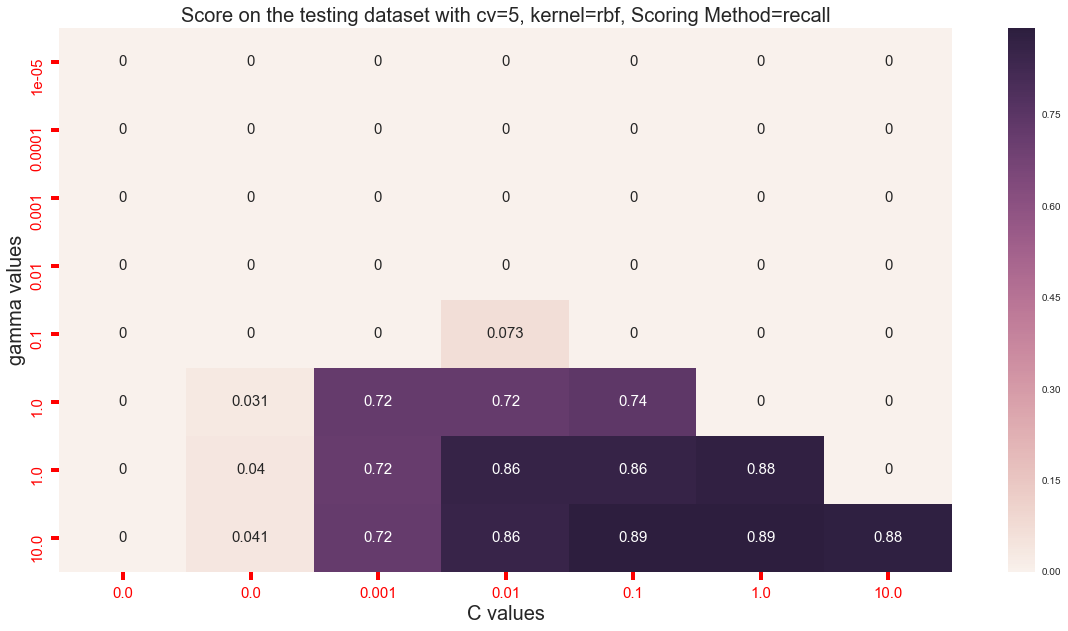

In [59]:
#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(np.array(X_norm), 
                                                 #Predictor Variables
                                                 np.array(Y), 
                                                 #Class labels
                                                 stratify = np.array(Y), 
                                                 #data is split in a stratified fashion, using this as the class labels
                                                 test_size=0.34,
                                                 #Test size is set as 34% of entire set
                                                 random_state=18
                                                 # Set the randon state for spliting data  in same order
                                                )



#Pre-set parameters for the classifier
#kernel_lst = ("rbf")
C_lst = [0.00001,0.0001,0.001,0.01,0.1,1,10]
gamma_lst =[0.00001,0.0001,0.001,0.01,0.1,1,1,10]
tuned_parameters = [{'C':C_lst,
                     'gamma': gamma_lst}]


scores = ['accuracy','precision','recall']

for score in scores:
    print("# Tuning Non-Linear SVM parameters for %s" % score)
    print()
    #Find the best parameters value to the classifier by cross-validation method
    clf = GridSearchCV(svm.SVC(kernel='rbf'), tuned_parameters, cv=5, scoring='%s' % score)
 
    clf.fit(x_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()
    
    row_lst = gamma_lst 
    col_lst =C_lst
    heat_result = np.zeros((len(row_lst),len(col_lst)))
    count=0
    for i in range(len(row_lst)):
        a_lst=[]
        for j in range(len(col_lst)):
            a_lst.append(means[count])
            count+=1
        heat_result[i]=a_lst

    heat_result_df = pd.DataFrame(heat_result, columns=np.round(col_lst,decimals=3), index = row_lst)
    import seaborn as sns
    plt.figure(figsize = (20,10))
    sns.heatmap(heat_result_df, annot=True, annot_kws={"size": 15},)
    plt.title("Score on the testing dataset with cv=5, kernel=rbf, Scoring Method=%s"%(score), size=20)
    plt.ylabel("gamma values", size=20)
    plt.xlabel("C values", size=20)
    plt.tick_params(direction='out', length=8, width=4, colors='r', labelsize=15)
    plt.show()

# Tuning Non-Linear NuSVM parameters for accuracy

Best parameters set found on development set:

{'gamma': 10, 'nu': 0.29999999999999999}

Grid scores on development set:

0.337 (+/-0.495) for {'gamma': 1e-05, 'nu': 0.29999999999999999}
0.783 (+/-0.082) for {'gamma': 1e-05, 'nu': 0.3342857142857143}
0.795 (+/-0.081) for {'gamma': 1e-05, 'nu': 0.36857142857142855}
0.807 (+/-0.025) for {'gamma': 1e-05, 'nu': 0.40285714285714286}
0.836 (+/-0.054) for {'gamma': 1e-05, 'nu': 0.43714285714285717}
0.836 (+/-0.049) for {'gamma': 1e-05, 'nu': 0.47142857142857142}
0.736 (+/-0.241) for {'gamma': 1e-05, 'nu': 0.50571428571428578}
0.824 (+/-0.023) for {'gamma': 1e-05, 'nu': 0.54000000000000004}
0.834 (+/-0.092) for {'gamma': 1e-05, 'nu': 0.57428571428571429}
0.853 (+/-0.059) for {'gamma': 1e-05, 'nu': 0.60857142857142854}
0.852 (+/-0.064) for {'gamma': 1e-05, 'nu': 0.64285714285714279}
0.837 (+/-0.075) for {'gamma': 1e-05, 'nu': 0.67714285714285716}
0.849 (+/-0.050) for {'gamma': 1e-05, 'nu': 0.71

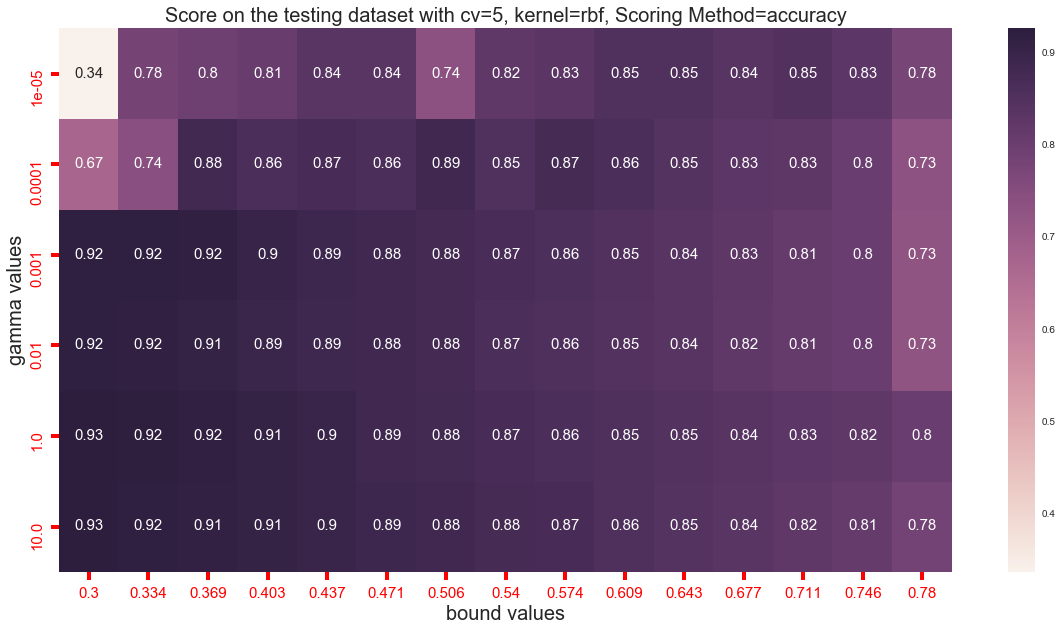

# Tuning Non-Linear NuSVM parameters for precision

Best parameters set found on development set:

{'gamma': 10, 'nu': 0.29999999999999999}

Grid scores on development set:

0.350 (+/-0.469) for {'gamma': 1e-05, 'nu': 0.29999999999999999}
0.842 (+/-0.243) for {'gamma': 1e-05, 'nu': 0.3342857142857143}
0.707 (+/-0.192) for {'gamma': 1e-05, 'nu': 0.36857142857142855}
0.814 (+/-0.205) for {'gamma': 1e-05, 'nu': 0.40285714285714286}
0.866 (+/-0.117) for {'gamma': 1e-05, 'nu': 0.43714285714285717}
0.799 (+/-0.120) for {'gamma': 1e-05, 'nu': 0.47142857142857142}
0.708 (+/-0.370) for {'gamma': 1e-05, 'nu': 0.50571428571428578}
0.869 (+/-0.146) for {'gamma': 1e-05, 'nu': 0.54000000000000004}
0.818 (+/-0.179) for {'gamma': 1e-05, 'nu': 0.57428571428571429}
0.822 (+/-0.027) for {'gamma': 1e-05, 'nu': 0.60857142857142854}
0.833 (+/-0.113) for {'gamma': 1e-05, 'nu': 0.64285714285714279}
0.814 (+/-0.141) for {'gamma': 1e-05, 'nu': 0.67714285714285716}
0.813 (+/-0.132) for {'gamma': 1e-05, 'nu': 0.7

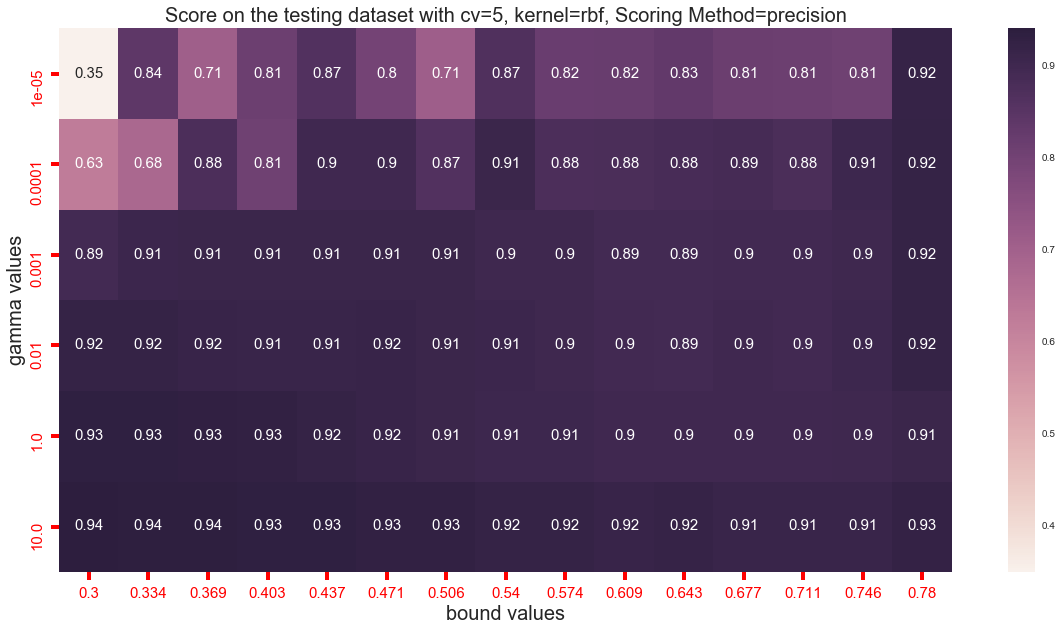

# Tuning Non-Linear NuSVM parameters for recall

Best parameters set found on development set:

{'gamma': 0.0001, 'nu': 0.40285714285714286}

Grid scores on development set:

0.522 (+/-0.413) for {'gamma': 1e-05, 'nu': 0.29999999999999999}
0.621 (+/-0.400) for {'gamma': 1e-05, 'nu': 0.3342857142857143}
0.876 (+/-0.160) for {'gamma': 1e-05, 'nu': 0.36857142857142855}
0.712 (+/-0.296) for {'gamma': 1e-05, 'nu': 0.40285714285714286}
0.702 (+/-0.220) for {'gamma': 1e-05, 'nu': 0.43714285714285717}
0.798 (+/-0.237) for {'gamma': 1e-05, 'nu': 0.47142857142857142}
0.828 (+/-0.347) for {'gamma': 1e-05, 'nu': 0.50571428571428578}
0.671 (+/-0.192) for {'gamma': 1e-05, 'nu': 0.54000000000000004}
0.776 (+/-0.295) for {'gamma': 1e-05, 'nu': 0.57428571428571429}
0.800 (+/-0.185) for {'gamma': 1e-05, 'nu': 0.60857142857142854}
0.795 (+/-0.217) for {'gamma': 1e-05, 'nu': 0.64285714285714279}
0.778 (+/-0.221) for {'gamma': 1e-05, 'nu': 0.67714285714285716}
0.818 (+/-0.112) for {'gamma': 1e-05, 'nu': 0.

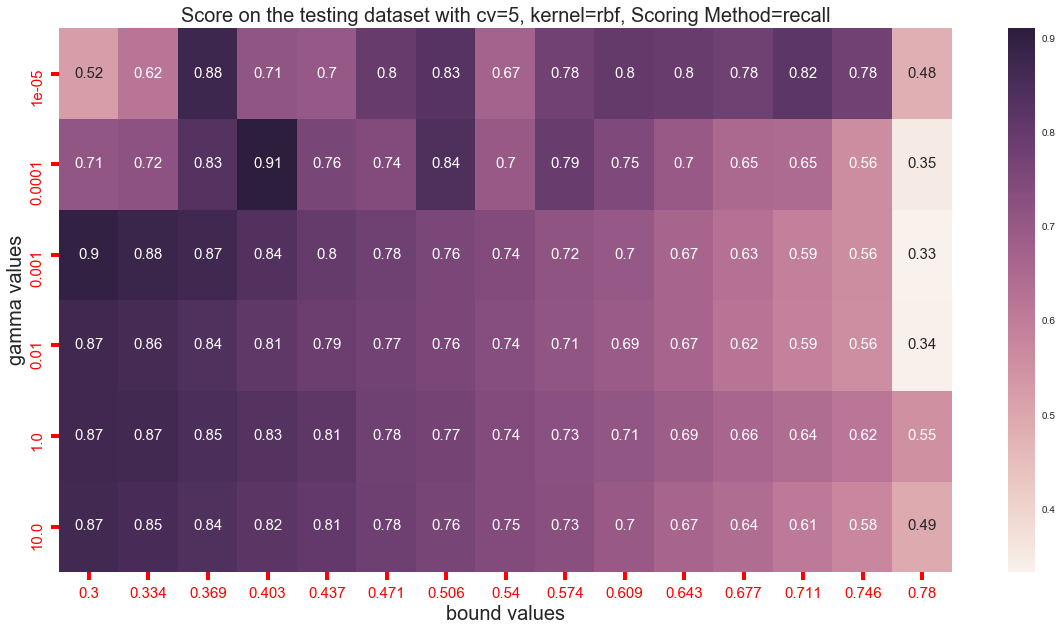

In [176]:
from sklearn.svm import NuSVC

#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(np.array(X_norm), 
                                                 #Predictor Variables
                                                 np.array(Y), 
                                                 #Class labels
                                                 stratify = np.array(Y), 
                                                 #data is split in a stratified fashion, using this as the class labels
                                                 test_size=0.34,
                                                 #Test size is set as 34% of entire set
                                                 random_state=18
                                                 # Set the randon state for spliting data  in same order
                                                )



#Pre-set parameters for the classifier
#kernel_lst = ["rbf","poly"]
nu_lst = list(np.linspace(0.3,0.78,15))
gamma_lst = [0.00001,0.0001,0.001,0.01,1,10]
tuned_parameters = [{'gamma': gamma_lst,
                     "nu": nu_lst
                    }]


scores = ['accuracy','precision','recall']

for score in scores:
    print("# Tuning Non-Linear NuSVM parameters for %s" % score)
    print()
    #Find the best parameters value to the classifier by cross-validation method
    clf = GridSearchCV(NuSVC(kernel='rbf'), tuned_parameters, cv=5, scoring='%s' % score)
 
    clf.fit(x_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    
    stds = clf.cv_results_['std_test_score']
    
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()
    
    row_lst = gamma_lst 
    col_lst =nu_lst
    
    heat_result = np.zeros((len(row_lst),len(col_lst)))
    count=0
    for i in range(len(row_lst)):
        a_lst=[]
        for j in range(len(col_lst)):
            a_lst.append(means[count])
            count+=1
        heat_result[i]=a_lst

    heat_result_df = pd.DataFrame(heat_result, columns=np.round(col_lst,decimals=3), index = row_lst)
    import seaborn as sns
    plt.figure(figsize = (20,10))
    sns.heatmap(heat_result_df, annot=True, annot_kws={"size": 15},)
    plt.title("Score on the testing dataset with cv=5, kernel=rbf, Scoring Method=%s"%(score), size=20)
    plt.ylabel("gamma values", size=20)
    plt.xlabel("bound values", size=20)
    plt.tick_params(direction='out', length=8, width=4, colors='r', labelsize=15)
    plt.show()

In [58]:
def calc_params(x_train,x_test,y_train, clf):
    model=clf
    model = model.fit(x_train,y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    return pred_train, pred_test

def calc_accuracy(pred_train, pred_test, y_train, y_test):
    train_score = accuracy_score(y_train, pred_train)
    test_score = accuracy_score(y_test, pred_test)
    return train_score, test_score

###Retest the classifier with the parameters 

In [66]:
#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(np.array(X_norm), 
                                                 #Predictor Variables
                                                 np.array(Y), 
                                                 #Class labels
                                                 stratify = np.array(Y), 
                                                 #data is split in a stratified fashion, using this as the class labels
                                                 test_size=0.34
                                                 #Test size is set as 34% of entire set
                                                 #random_state=18
                                                 # Set the randon state for spliting data  in same order
                                                )

clf = svm.SVC(kernel='rbf', C=10, gamma=0.1)
clf.fit(x_train, y_train)


clf = svm.SVC(kernel='rbf', C=10, gamma=0.1)
pred_train, pred_test = calc_params(x_train,x_test,y_train, clf)
train_score, test_score = calc_accuracy(pred_train, pred_test, y_train, y_test)

print("The Score of Training set by Non-Linear SVM classifier is ", train_score)
print("The Score of Testing set by Non-Linear SVM classifier is ", test_score)

The Score of Training set by Non-Linear SVM classifier is  0.921936758893
The Score of Testing set by Non-Linear SVM classifier is  0.916293929712


The following shows different measuring metrics on different combination of 

##Problem-1-b: AdaBoost

Ans:

According to the followings, the proposed best parameter (i.e.number of iterations = 25, criterion = 'gini') on the AdaBoost classifier would be 25 iterations. In the consideration of Model complexity, the less number of iterations, the simplier of model complexity. So that iterations =25 would fulfill this factor. Regarding to the accuracy, iterations=25 would be the optimal point, over-fitting condition begins at this point and under-fitting condition happens before this point.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import math

In [14]:
def calc_params(x_train,x_test,y_train, clf):
    model=clf
    model = model.fit(x_train,y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    return pred_train, pred_test

def calc_accuracy(pred_train, pred_test, y_train, y_test):
    train_score = accuracy_score(y_train, pred_train)
    test_score = accuracy_score(y_test, pred_test)
    return train_score, test_score

Dimenision of Training Predictor Samples is  (3036, 57)
Dimenision of Training Target Samples is  (3036,)
Dimenision of Testing Predictors Sample is  (1565, 57)
Dimenision of Testing Target Samples is  (1565,)


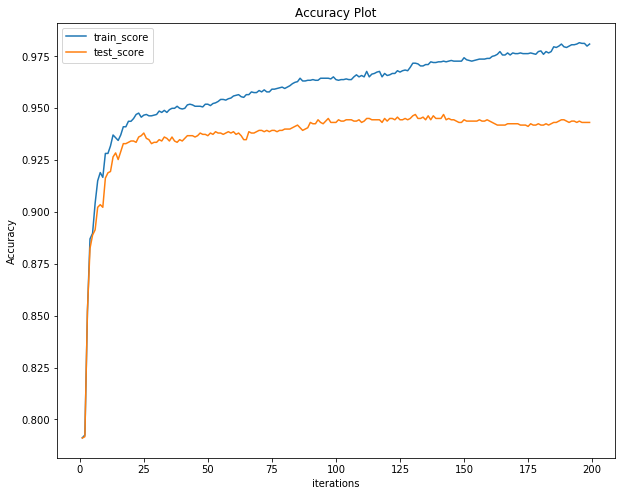

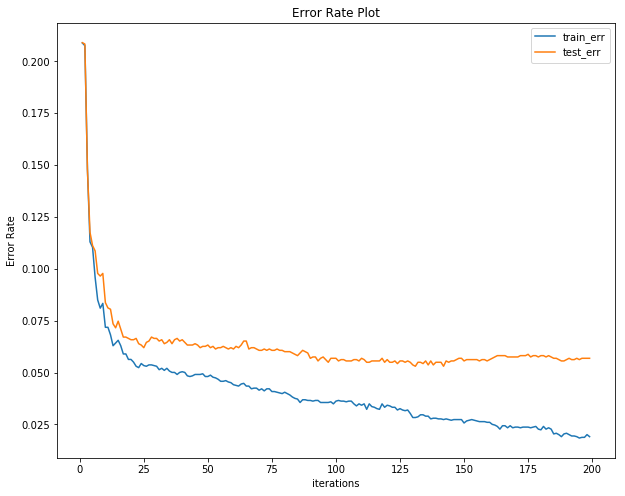

In [51]:
#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(np.array(X_norm), 
                                                 #Predictor Variables
                                                 np.array(Y), 
                                                 #Class labels
                                                 stratify = np.array(Y), 
                                                 #data is split in a stratified fashion, using this as the class labels
                                                 test_size=0.34,
                                                 #Test size is set as 34% of entire set
                                                 random_state=18
                                                 # Set the randon state for spliting data  in same order
                                                )
#Check the size of the Samples in Training and Testing Samples
print("Dimenision of Training Predictor Samples is ",x_train.shape)
print("Dimenision of Training Target Samples is ",y_train.shape)
print("Dimenision of Testing Predictors Sample is ",x_test.shape)
print("Dimenision of Testing Target Samples is ",y_test.shape)

train_score_lst=[]
test_score_lst=[]


for i in range(1,200):
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1,criterion ='gini'),n_estimators=i)
    pred_train, pred_test = calc_params(x_train,x_test,y_train, clf)
    train_score, test_score = calc_accuracy(pred_train, pred_test, y_train, y_test)
    train_score_lst.append(train_score)
    test_score_lst.append(test_score)

iter_lst = np.linspace(1,199,199)
df = pd.DataFrame(list(zip(iter_lst,train_score_lst,test_score_lst)), 
                  columns=("iterations","train_score","test_score"))
df.plot(x="iterations",figsize=(10,8))
plt.ylabel("Accuracy")
plt.title("Accuracy Plot")

train_err_lst = 1-np.array(train_score_lst)
test_err_lst = 1-np.array(test_score_lst)
df2 = pd.DataFrame(list(zip(iter_lst,train_err_lst,test_err_lst)), 
                   columns=("iterations","train_err","test_err"))
df2.plot(x="iterations",figsize=(10,8))
plt.ylabel("Error Rate")
plt.title("Error Rate Plot")
plt.show()

Dimenision of Training Predictor Samples is  (3036, 57)
Dimenision of Training Target Samples is  (3036,)
Dimenision of Testing Predictors Sample is  (1565, 57)
Dimenision of Testing Target Samples is  (1565,)


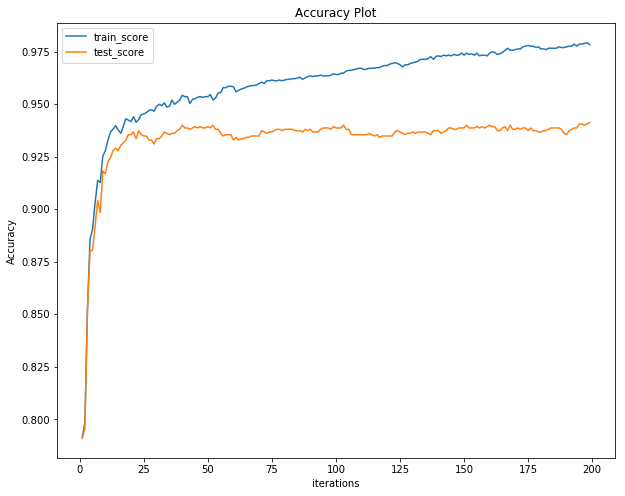

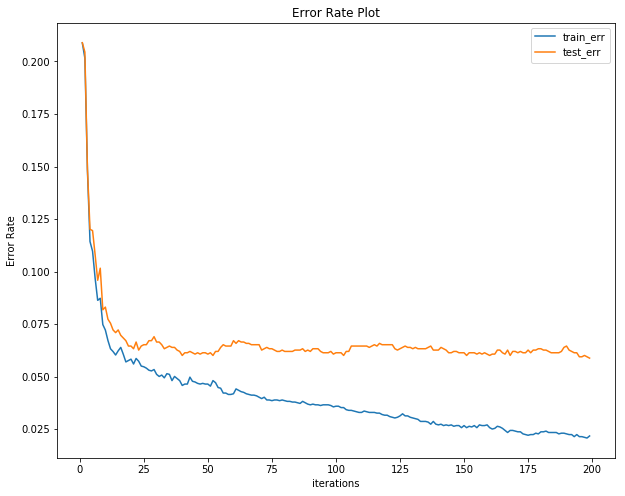

In [52]:
#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(np.array(X_norm), 
                                                 #Predictor Variables
                                                 np.array(Y), 
                                                 #Class labels
                                                 stratify = np.array(Y), 
                                                 #data is split in a stratified fashion, using this as the class labels
                                                 test_size=0.34,
                                                 #Test size is set as 34% of entire set
                                                 random_state=18
                                                 # Set the randon state for spliting data  in same order
                                                )
#Check the size of the Samples in Training and Testing Samples
print("Dimenision of Training Predictor Samples is ",x_train.shape)
print("Dimenision of Training Target Samples is ",y_train.shape)
print("Dimenision of Testing Predictors Sample is ",x_test.shape)
print("Dimenision of Testing Target Samples is ",y_test.shape)

train_score_lst=[]
test_score_lst=[]


for i in range(1,200):
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1,criterion ='entropy'),n_estimators=i)
    pred_train, pred_test = calc_params(x_train,x_test,y_train, clf)
    train_score, test_score = calc_accuracy(pred_train, pred_test, y_train, y_test)
    train_score_lst.append(train_score)
    test_score_lst.append(test_score)

iter_lst = np.linspace(1,199,199)
df = pd.DataFrame(list(zip(iter_lst,train_score_lst,test_score_lst)), 
                  columns=("iterations","train_score","test_score"))
df.plot(x="iterations",figsize=(10,8))
plt.ylabel("Accuracy")
plt.title("Accuracy Plot")

train_err_lst = 1-np.array(train_score_lst)
test_err_lst = 1-np.array(test_score_lst)
df2 = pd.DataFrame(list(zip(iter_lst,train_err_lst,test_err_lst)), 
                   columns=("iterations","train_err","test_err"))
df2.plot(x="iterations",figsize=(10,8))
plt.ylabel("Error Rate")
plt.title("Error Rate Plot")
plt.show()

In [146]:
#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(np.array(X_norm), 
                                                 #Predictor Variables
                                                 np.array(Y), 
                                                 #Class labels
                                                 stratify = np.array(Y), 
                                                 #data is split in a stratified fashion, using this as the class labels
                                                 test_size=0.34
                                                 #Test size is set as 34% of entire set
                                                 #random_state=18
                                                 # Set the randon state for spliting data  in same order
                                                )

clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1,criterion ='gini'),n_estimators=25)
pred_train, pred_test = calc_params(x_train,x_test,y_train, clf)
train_score, test_score = calc_accuracy(pred_train, pred_test, y_train, y_test)
print("The Score of Training set by AdaBoost with DecisionTree (maxdepth=1) classifier is", train_score)
print("The Score of Testing set by AdaBoost with DecisionTree (maxdepth=1) classifier is", test_score)


The Score of Training set by AdaBoost with DecisionTree (maxdepth=1) classifier is 0.945981554677
The Score of Testing set by AdaBoost with DecisionTree (maxdepth=1) classifier is 0.923322683706


##Problem-1-c:Evaluate and discuss which method is more reliable

Ans:

Based on the following data exploration, there is some noisy datas which includes 394 duplicated data records and outliners on the attributes. However, there is No missing values thorughout the dataset. Also the values of dataset variables are not in the same scale even though they are continuous numeric values, so that I have all of the attributes normalized before running the classification steps. 

By observating the following t-test, we could find out that their accuracy is significantly different between TWO algorithms (Adaboost and SVM). The AdaBoost with Decision Tree stumps got the better Accuracy on both Training and testing set, so that I believe that AdaBoost handles better on this noisy dataset.

--------------t-test-------------

Training Set: The t-statistics is 47.283 with df=99 (Degree of Freedom) which means that the corresponding p-value is less than 0.25. With assumed 95% Confidence Interval, we could reject he P0 Null hypothesis since the p-value is less than 0.025. In other words, we have strong evidence that Mean of Accuracy the TWO Training set is statistically significanly different from each other

Testing Set: The t-statistics is 16.859 with df=99 (Degree of Freedom) which means that the corresponding p-value is greater 3.24e-31. With assumed 95% Confidence Interval, we should reject he P0 Null hypothesis since the p-value is less than 0.025. In other words, we have strong evidence that Mean of Accuarcy the TWO Testing set is statistically significanly different from each other.

The orginal number of instance is 4601
The duplicated number of instance is 394
The is 0 missing values

0    2788
1    1813
Name: target, dtype: int64



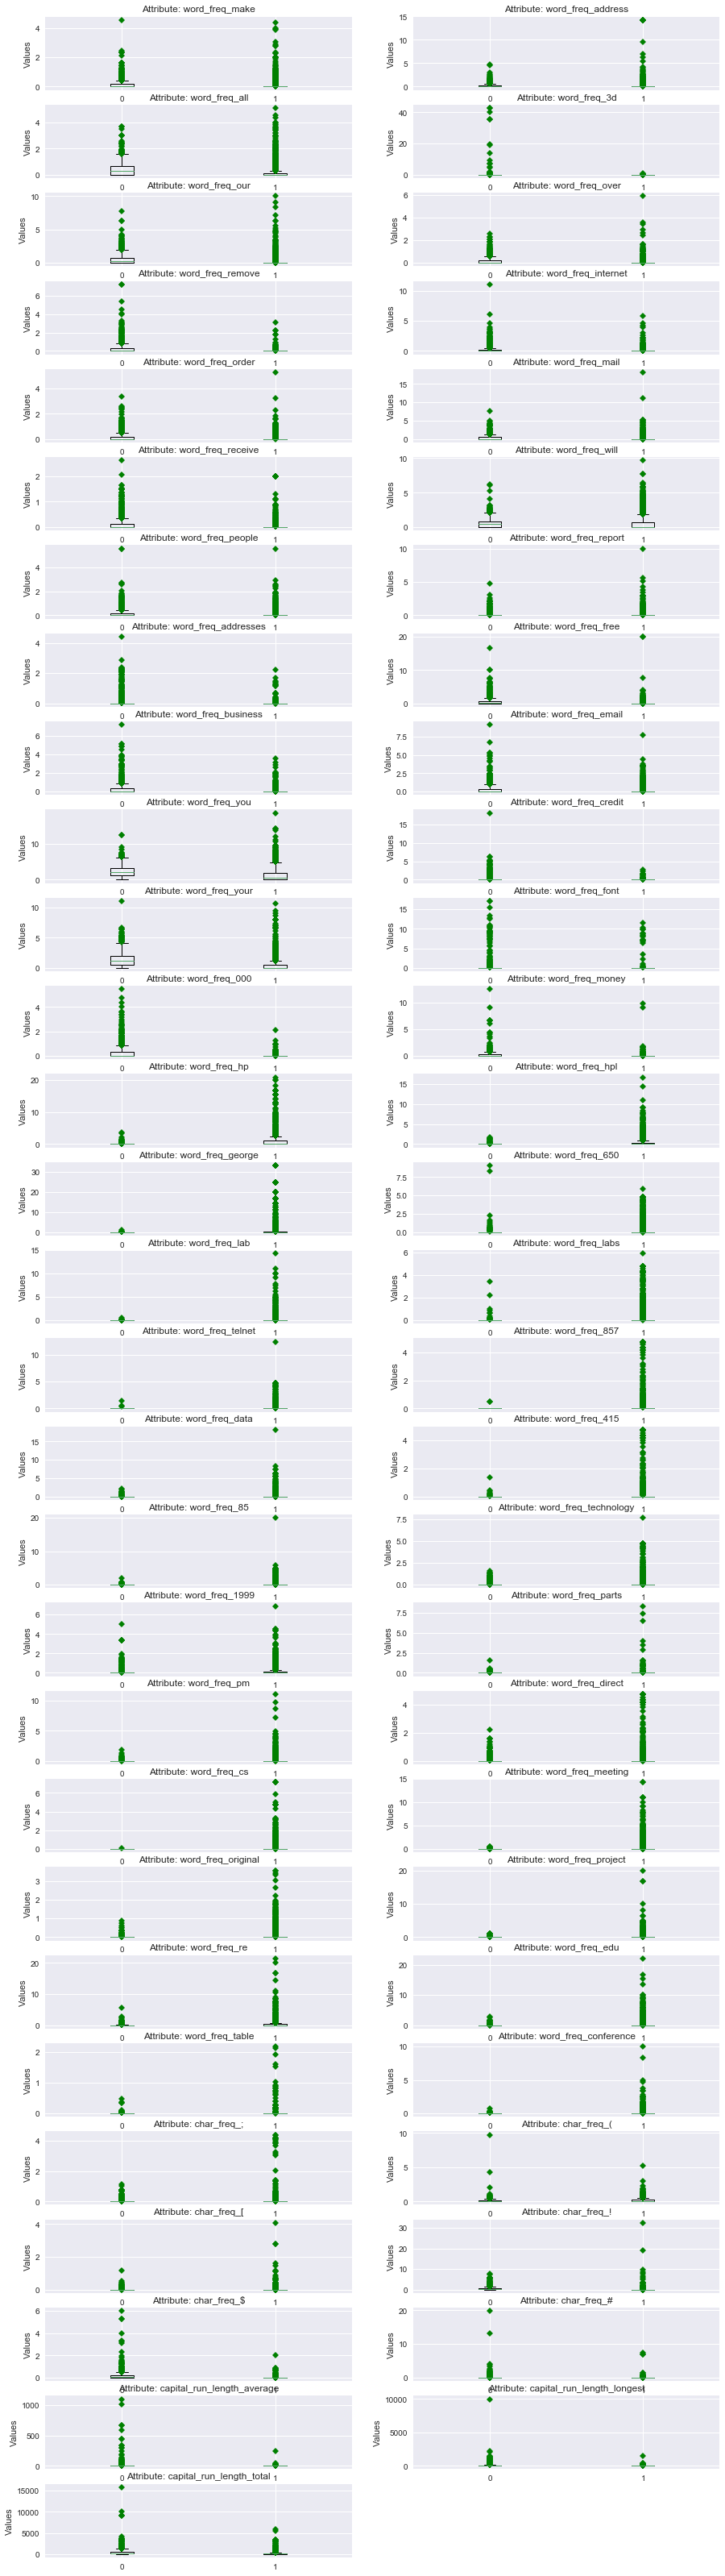

In [138]:
X_arr = np.array(X)
arr , ind, ct = np.unique(X_arr, axis=0, return_index=True,return_counts=True)
print("The orginal number of instance is",X.shape[0])
print("The duplicated number of instance is",X.shape[0]-arr.shape[0])
print("The is",X.isnull().sum().sum(),"missing values")
print()
print(Y.value_counts())
print()

data_1 = data_df[data_df.loc[:,"target"]==1]
data_0 = data_df[data_df.loc[:,"target"]==0]

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (15,60))
for i in range(0, len(data_1.columns)-1):
    combine_col = [np.array(data_1.iloc[:,i]),np.array(data_0.iloc[:,i])]
    ax1 = fig.add_subplot(30,2,i+1)
    plt.boxplot(combine_col,0,'gD')
    ax1.set_title("Attribute: %s"%data_1.columns[i])
    #ax1.set_xlabel("Class Labels")
    ax1.set_xticklabels([0,1])
    ax1.set_ylabel("Values")
plt.show()

In [ ]:
def calc_params(x_train,x_test,y_train, clf):
    model=clf
    model = model.fit(x_train,y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    return pred_train, pred_test

def calc_accuracy(pred_train, pred_test, y_train, y_test):
    train_score = accuracy_score(y_train, pred_train)
    test_score = accuracy_score(y_test, pred_test)
    return train_score, test_score

In [150]:
ada_train_score_lst=[]
ada_test_score_lst=[]
svm_train_score_lst=[]
svm_test_score_lst=[]

for i in range(0,100):

    #Split the train set, test set, train class, test class
    from sklearn.cross_validation import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(np.array(X_norm), 
                                                     #Predictor Variables
                                                     np.array(Y), 
                                                     #Class labels
                                                     stratify = np.array(Y), 
                                                     #data is split in a stratified fashion, using this as the class labels
                                                     test_size=0.34
                                                     #Test size is set as 34% of entire set
                                                     #random_state=18
                                                     # Set the randon state for spliting data  in same order
                                                    )

    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1,criterion ='gini'),n_estimators=25)
    pred_train, pred_test = calc_params(x_train,x_test,y_train, clf)
    train_score, test_score = calc_accuracy(pred_train, pred_test, y_train, y_test)
    ada_train_score_lst.append(train_score)
    ada_test_score_lst.append(test_score)

    clf = svm.SVC(kernel='rbf', C=10, gamma=0.1)
    pred_train, pred_test = calc_params(x_train,x_test,y_train, clf)
    train_score, test_score = calc_accuracy(pred_train, pred_test, y_train, y_test)
    svm_train_score_lst.append(train_score)
    svm_test_score_lst.append(test_score)



In [165]:
#Calculate Difference of Score of training Data of the Decision Tree and Naive Bayes Models
diff_score = list(map(lambda x,y: x-y, ada_train_score_lst,svm_train_score_lst))

#Transform the Score lists into DataFrame
df = pd.DataFrame(list(zip(ada_train_score_lst,svm_train_score_lst,diff_score)), 
                  columns=['AdaBoost_train_score','SVM_train_score','Score_Difference'])
print("Table Size is ",df.shape)
print(df.head(5))

#Calculate the t-train statistics and p-value for training set
from scipy import stats
t_stat, p_value = stats.ttest_ind(ada_train_score_lst,svm_train_score_lst,equal_var = False)
print("")
print("training Set: t_statistic is %0.3f and p-value is %0.6f"% (t_stat, p_value))



#Calculate Difference of Score of Testing Data of the Decision Tree and Naive Bayes Models
diff_score = list(map(lambda x,y: x-y, ada_test_score_lst,svm_test_score_lst))

#Transform the Score lists into DataFrame
df = pd.DataFrame(list(zip(ada_test_score_lst,svm_test_score_lst,diff_score)), 
                  columns=['AdaBoost_test_score','SVM_test_score','Score_Difference'])
print("Table Size is ",df.shape)
print(df.head(5))

#Calculate the t-test statistics and p-value for testing set
from scipy import stats
t_stat, p_value = stats.ttest_ind(ada_test_score_lst,svm_test_score_lst,equal_var = False)
print("")
print("Testing Set: t_statistic is %0.3f and p-value is %0.6f"% (t_stat, p_value))

Table Size is  (100, 3)
   AdaBoost_train_score  SVM_train_score  Score_Difference
0              0.941700         0.916667          0.025033
1              0.949934         0.919960          0.029974
2              0.944664         0.921278          0.023386
3              0.940382         0.917984          0.022398
4              0.943017         0.921607          0.021410

training Set: t_statistic is 47.283 and p-value is 0.000000
Table Size is  (100, 3)
   AdaBoost_test_score  SVM_test_score  Score_Difference
0             0.941214        0.925240          0.015974
1             0.930351        0.909904          0.020447
2             0.932907        0.910543          0.022364
3             0.940575        0.918850          0.021725
4             0.933546        0.920128          0.013419

Testing Set: t_statistic is 16.859 and p-value is 0.000000
